# Introduction to FCC analysis

The FCC (Future Circular Collider) is a proposed collider to be built at CERN for use after the end of the LHC's lifetime. In order to estimate the physics reach of this potential future machine, we run feasibility studies using simulated physics processes, interacting with simulated detectors.

In this tutorial, we will look at different physics signatures through simulated data samples by plotting their process' observables in histograms.

# Signal

First, let's look at a signal file. Our signal is the ZH process, the production of a Z and Higgs boson at the same time. We're interested in studying this process to see if we can use it to make indirect statements about the Higgs self-coupling.

Remember - the Z boson and Higgs boson are unstable, so they decay into other particles before our detector ever observes them. We will look at the the process where the Z boson decays into two charm quarks (cc), and the Higgs boson decays in two b-quarks (bb).

In [2]:
# import required python modules
import uproot 
from matplotlib import pyplot as plt
import pandas 
import numpy as np

In [3]:
def Plot_Variable(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(6, 4), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_nel" : [0, 100, 100, "jet_nel"],
        "recojet_isG" : [0, 100, 100, "recojet_isG"],
        "recojetpair_isC" : [0, 100, 100, "recojetpair_isC"],
        "jet_nchad" : [0, 100, 100, "jet_nchad"],
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"],
        "recojetpair_isB" : [0, 100, 100, "recojetpair_isB"],
        "jet_mass" : [0, 100, 100, "jet_mass"],
        "jet_nmu" : [0, 100, 100, "jet_nmu"],
        "jet_p" : [0, 100, 100, "jet_p"],
        "jet_theta" : [0, 100, 100, "jet_theta"],
        "recojet_isQ" : [0, 100, 100, "recojet_isQ"],
        "recojet_isS" : [0, 100, 100, "recojet_isS"],
        "event_njet" : [0, 100, 100, "event_njet"],
        "jet_ngamma" : [0, 100, 100, "jet_ngamma"],
        "jet_nconst" : [0, 100, 100, "jet_nconst"],
        "recojet_isC" : [0, 100, 100, "recojet_isC"],
        "jet_phi" : [0, 100, 100, "jet_phi"],
        "recoil_masses" : [0, 100, 100, "recoil_masses"],
        "recojet_isB" : [0, 100, 100, "recojet_isB"],
        "jet_nnhad" : [0, 100, 100, "jet_nnhad"],
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["events"] # define events tree
        #t.keys() # print all branches # print all branches

        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 15
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend()
    
    fig.tight_layout()
    fig.show()

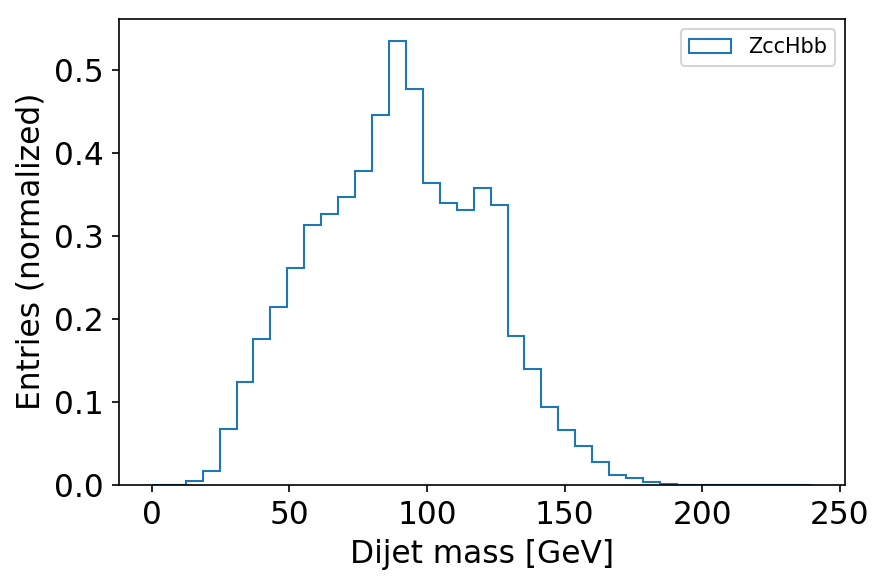

In [86]:
Plot_Variable(["ZccHbb.root"], "all_invariant_masses")

This is a plot of the invariant mass distribution of all possible pairs of jets. In the Z to cc leg of the decay, the two b-quarks will "hadronize", producing a cascade of hadronic interactions and decays which eventually leads to a spray of energy which can be contained in a cone, known as a "jet". 

Because we are taking the invariant mass of all jet pair combination, where there are 4 jets per event and therefore 6 possible combinations per event, we have a peak around 90 GeV - this is expected, as this is the invariant mass of the Z boson.

You will see there is also a peak, while not as clear, around 125 GeV - this is expected as this is the mass of the Higgs boson, and our process contains an H to bb decay, so the peak at 125 GeV corresponds to the invariant mass of jet pairs 

# Background

We have taken a look at the invariant mass from jets of our signal process, Z(cc)H(bb). At FCC-ee, while we expect to see this process, we also expect to see background processes which may mimic our signal process. Let's now produce the same invariant mass plot, but for the following background process: Non-resonant WW production, non-resonant ZZ production, and the Drell-Yan process (Z/y -> qq):

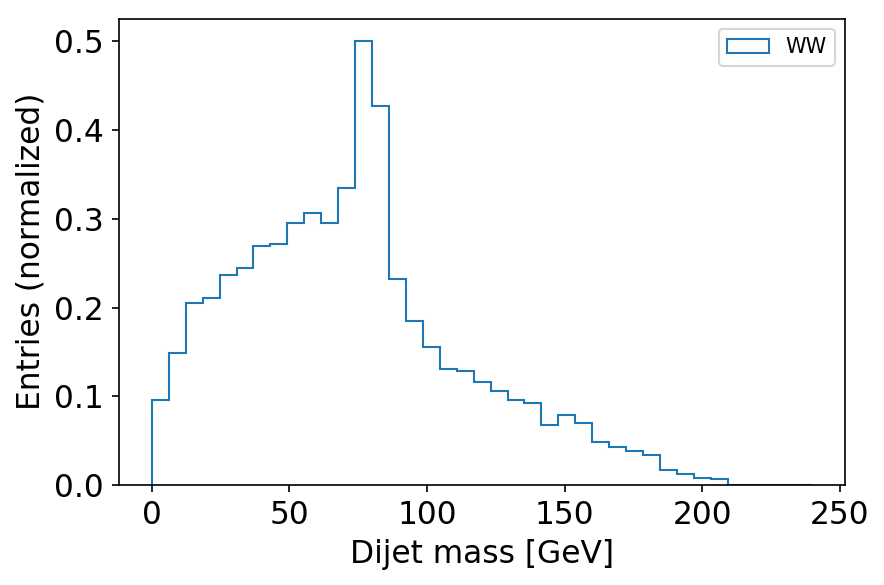

In [71]:
Plot_Variable(["WW.root"], "all_invariant_masses")

Here we can see that the invariant mass plot contains a peak around 80 GeV. This is expected because in the WW process, there will be events where the W boson decays into two quarks, which will hadronize and lead to two jets. Notice that there is *not* a peak near 125 GeV. This is also expected, because the WW process does not contain a Higgs boson. Let's look at the same for the ZZ process:

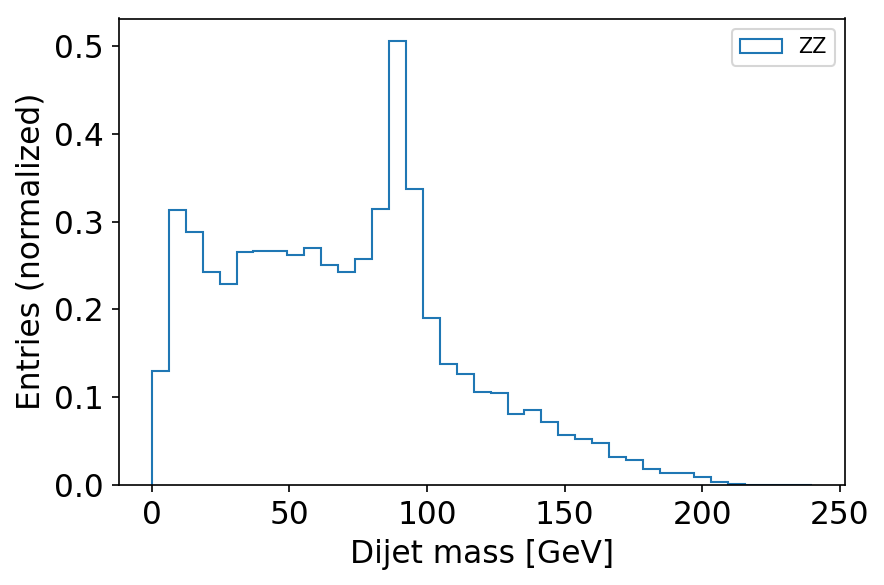

In [72]:
Plot_Variable(["ZZ.root"], "all_invariant_masses")

In this case, we see a peark around 90 GeV - this is expected, as this is the invariant mass of the Z boson, and in this process, the Z boson decays into a pair of quarks about 70% of the time. Finally, let's look at the third major resonant background, Drell-Yan (Where a Z boson or virtual photon decays into two quarks):

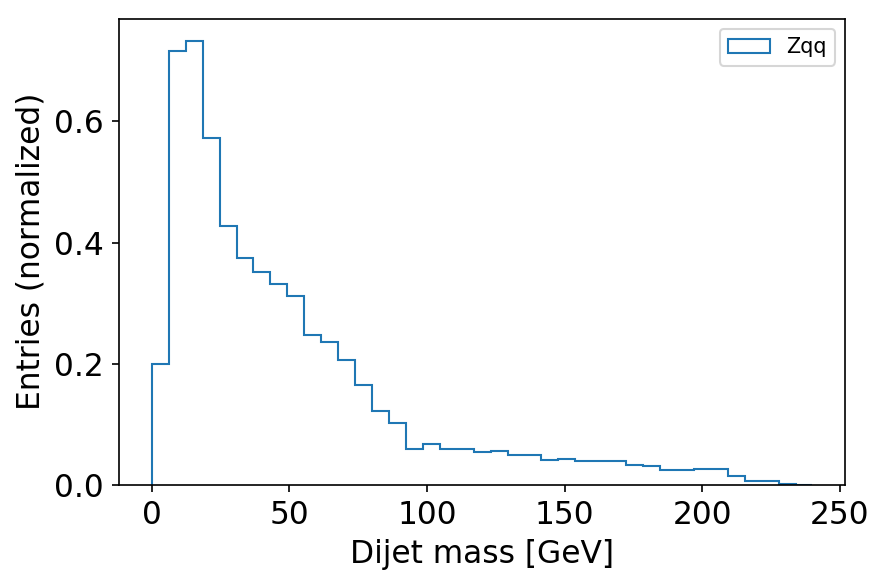

In [73]:
Plot_Variable(["Zqq.root"], "all_invariant_masses")

In this case, the majority of entries have a small invariant mass, around 10 GeV, with a long tail. This is mainly due to the virtual photon case of the decay, where the invariant mass may have a long non-peaking spectrum, as the photon is massless. 

# Signal and background together

It is important to look at individual signal and background process by themselves in order to gain an understanding of how their kinematic distributions look. However when we start taking data at FCC, the data we record is going to contain all of these processes, and it will be our job as analyzers to separate the signal events from background events without having an explicit label telling us the physics process that produced each one. 

Let's now look at the previous 4 processes plotted together on the same plot:

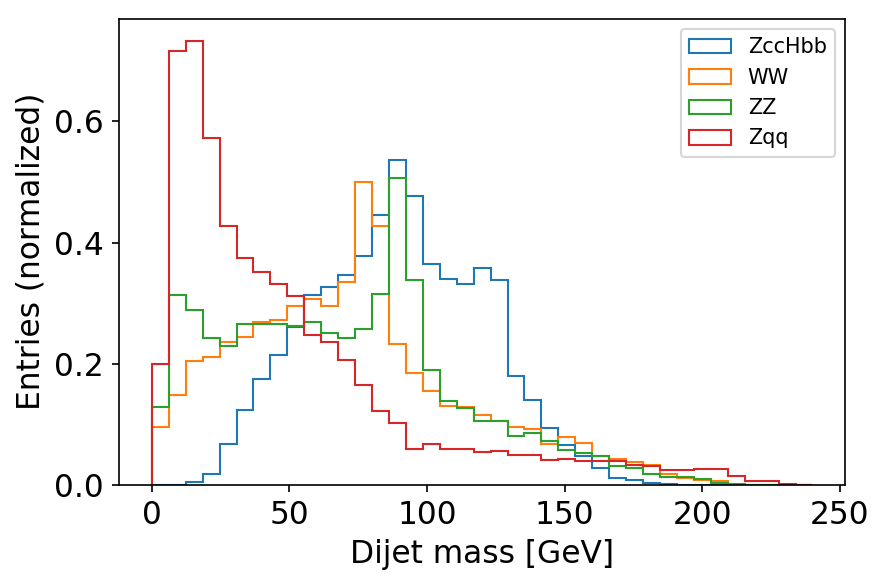

In [74]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "all_invariant_masses")

A few takeaways:
- When normalizing each distribution to unity, it is clear that our ZH signal is most likely to have a peak at 125 GeV. 
- Our backgrounds typically have a lower dijet mass than our signal, with some overlap around 90 GeV (because both our signal and background processes contain a Z boson).
- There is some likelihood of our backgrounds having dijet masses near the higgs peak of 125 GeV. Because our background processes are much more likely to occur than our signal process, this will lead to a large background contamination which we will have to remove to improve our signal sensitivity.

# Plotting other variables and comparisons

In the above we only looked at dijet invariant mass. Now, try plotting other variables contained in the input files. See the full list below:

- 'all_invariant_masses'
- 'jet_nel'
- 'recojet_isG'
- 'recojetpair_isC'
- 'jet_nchad'
- 'jet_e'
- 'recojetpair_isB'
- 'jet_mass'
- 'jet_nmu'
- 'jet_p'
- 'jet_theta'
- 'recojet_isQ'
- 'recojet_isS'
- 'event_njet'
- 'jet_ngamma'
- 'jet_nconst'
- 'recojet_isC'
- 'jet_phi'
- 'recoil_masses'
- 'recojet_isB'
- 'jet_nnhad'

For example, to look at the other jet kinematics, you can plot "jet_e", "jet_theta", "jet_phi". Note that you will also need to add an entry to the bin dictionary within the Plot_Variable function. 

Try this yourself by going to the line:

"Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel

and replacing "Additional_Variable_Here" with "jet_e", and setting the xmin, xmax, and nbins to 0, 150, 150, replacing "Variable x label [GeV]" with "Jet energy [GeV]". You will then have to re-run that cell to define the function, then run the below cell to make a plot of jet energy.

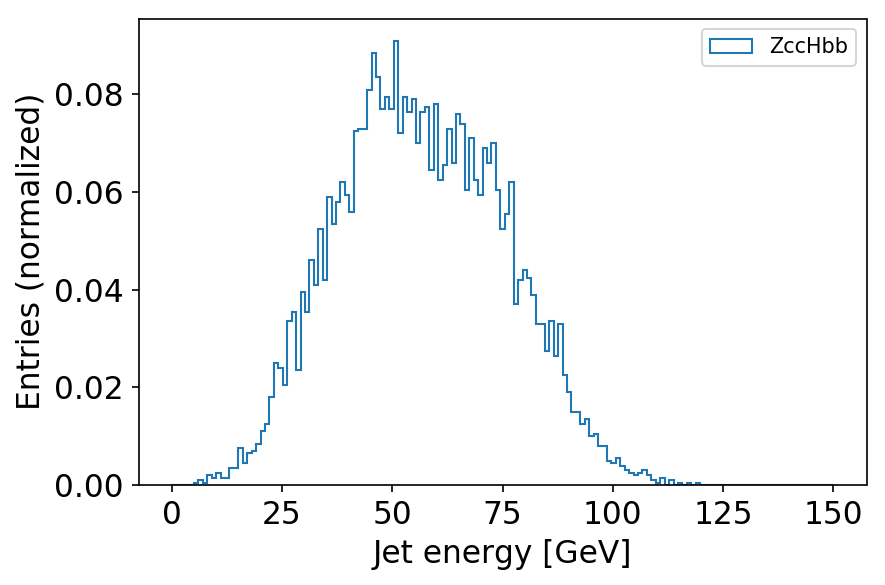

In [87]:
Plot_Variable(["ZccHbb.root"], "jet_e")

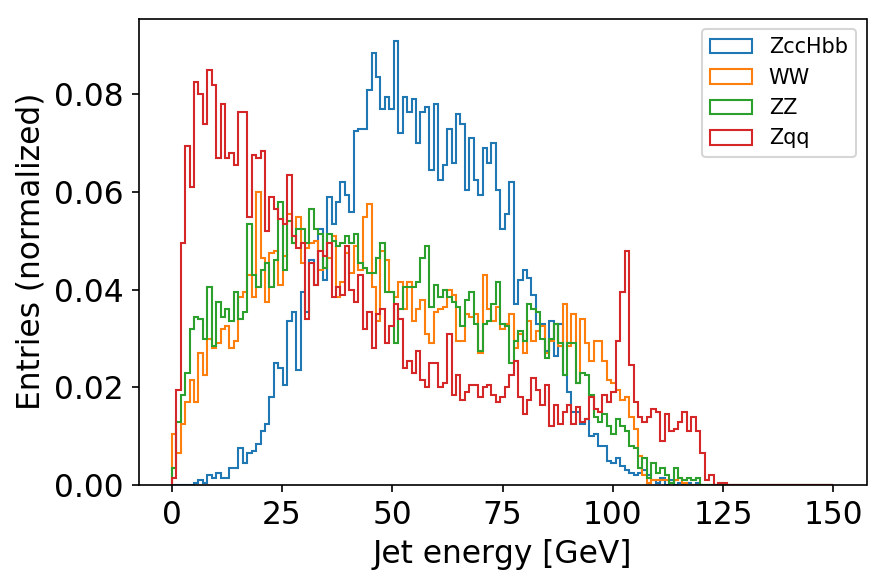

In [88]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_e")

# Messing around

In [106]:
def Plot_Variable(files, variable, log=False):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(6, 4), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_nel" : [0, 3, 4, "jet_nel"],
        "recojet_isG" : [0, 5, 10, "recojet_isG"],
        "recojetpair_isC" : [0, 2, 40, "recojetpair_isC"],
        "jet_nchad" : [0, 40, 40, "jet_nchad"],
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"],
        "recojetpair_isB" : [0, 2, 40, "recojetpair_isB"],
        "jet_mass" : [0, 70, 100, "jet_mass"],
        "jet_nmu" : [0, 5, 6, "jet_nmu"],
        "jet_p" : [0, 150, 150, "jet_p"],
        "jet_theta" : [0, 5, 100, "jet_theta"],
        "recojet_isQ" : [0, 1, 40, "recojet_isQ"],
        "recojet_isS" : [0, 1, 40, "recojet_isS"],
        "event_njet" : [0, 100, 100, "event_njet"],
        "jet_ngamma" : [0, 50, 50, "jet_ngamma"],
        "jet_nconst" : [0, 100, 100, "jet_nconst"],
        "recojet_isC" : [0, 1, 40, "recojet_isC"],
        "jet_phi" : [0, 10, 100, "jet_phi"],
        "recoil_masses" : [0, 240, 40, "recoil_masses"],
        "recojet_isB" : [0, 1, 40, "recojet_isB"],
        "jet_nnhad" : [0, 10, 11, "jet_nnhad"],
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1
    debug = 0

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["events"] # define events tree
        #tree.keys() # print all branches # print all branches

        variable_values = tree[variable].array(library="np")
        if(debug): print("variable_values:",variable_values)
        
        variable_values = variable_values[:nevents] # take first nevents only
        if(debug): print("variable_values:",variable_values)
        
        variable_values = variable_values.flatten()
        if(debug): print("variable_values:",variable_values)
        
        variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays
        if(debug): print("variable_values:",variable_values)

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 15
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    if(log): plt.yscale("log")
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend()
    
    fig.tight_layout()
    fig.show()

In [69]:
new_variable_test = 5
new_variable_test = new_variable_test - 1
print(new_variable_test)


4


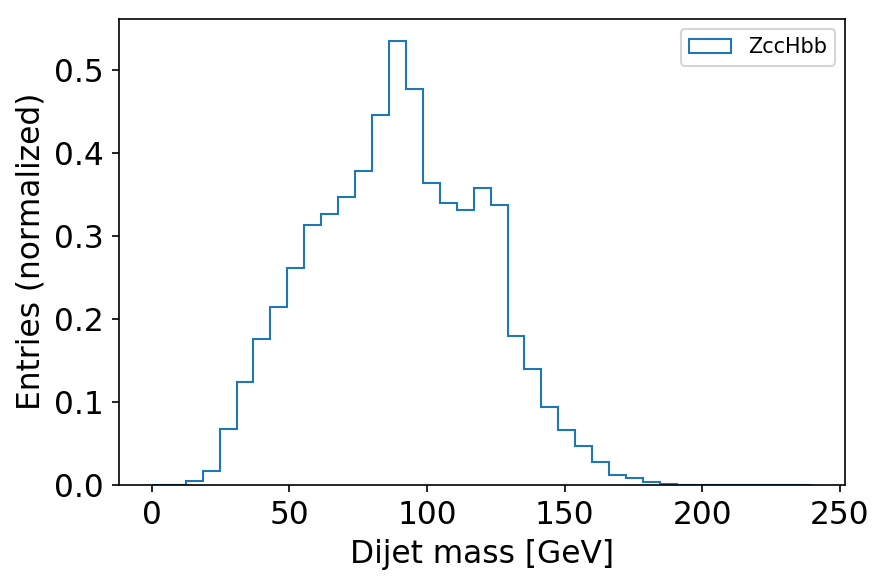

In [101]:
# Plot_Variable(["ZccHbb.root",
#                "WW.root",
#                "ZZ.root",
#                "Zqq.root"],
#                "all_invariant_masses")

Plot_Variable(["ZccHbb.root"],
               "all_invariant_masses")

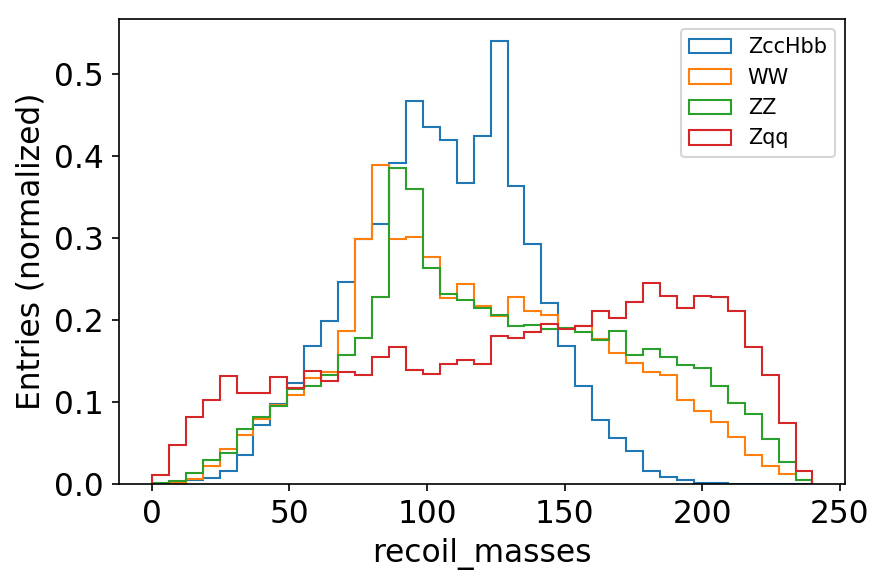

In [67]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recoil_masses")

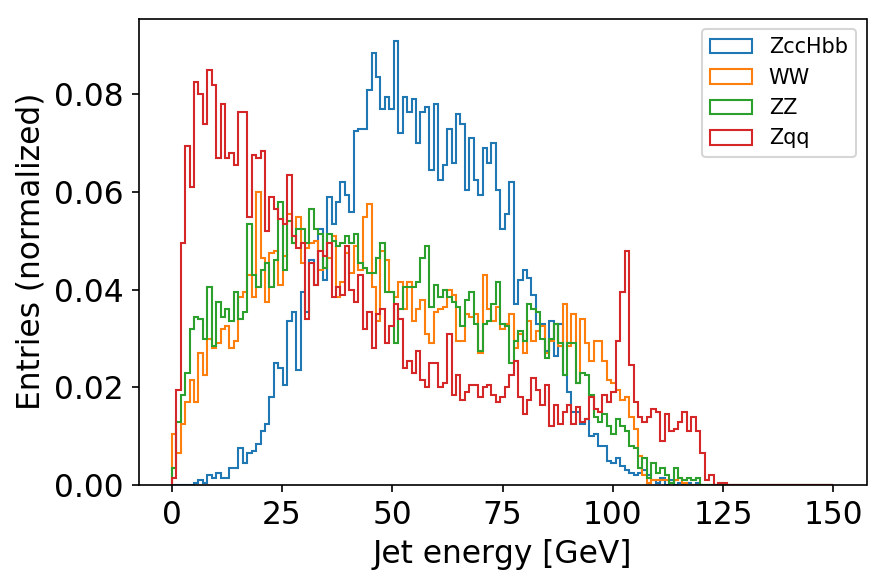

In [7]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_e")

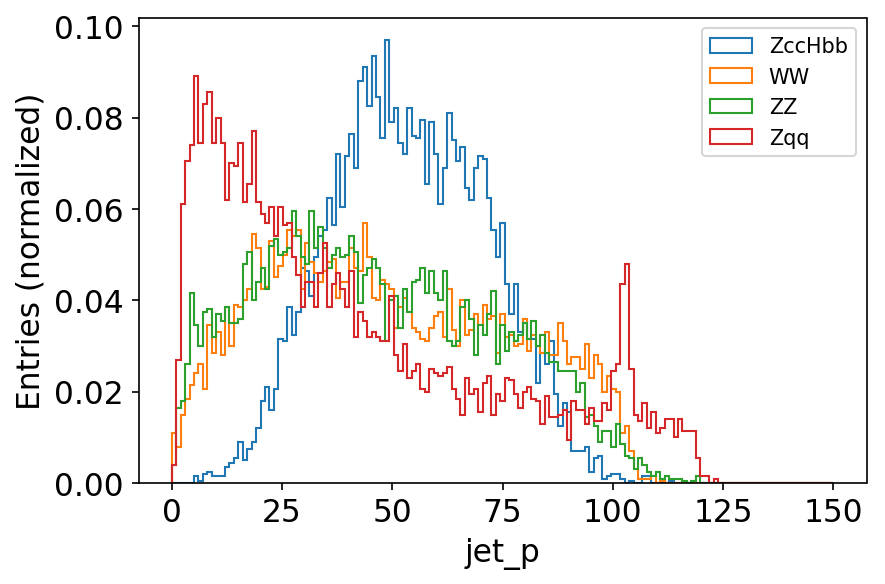

In [28]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_p")

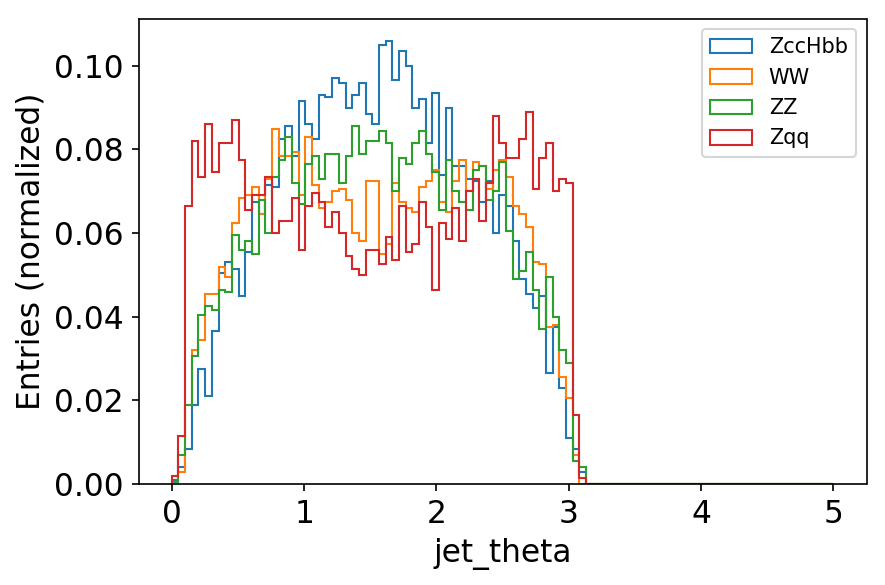

In [32]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_theta")

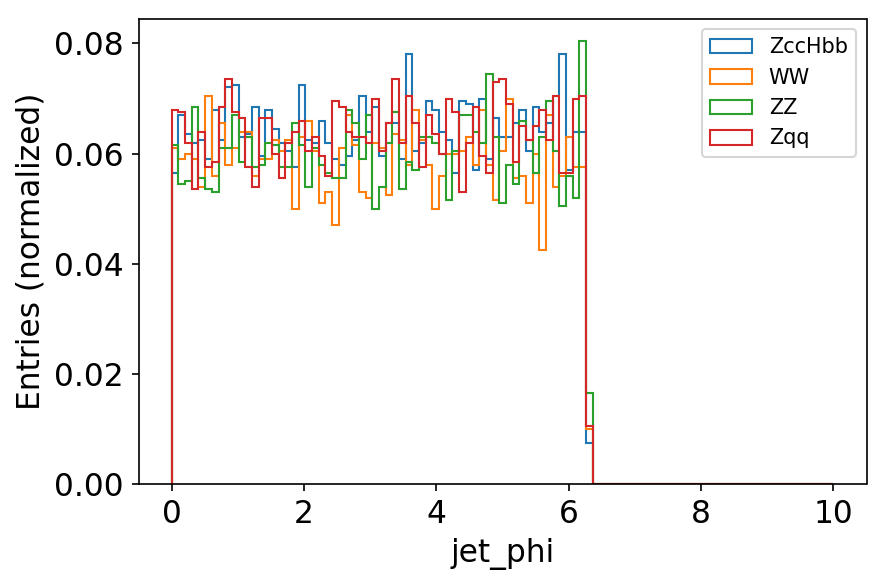

In [36]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_phi")

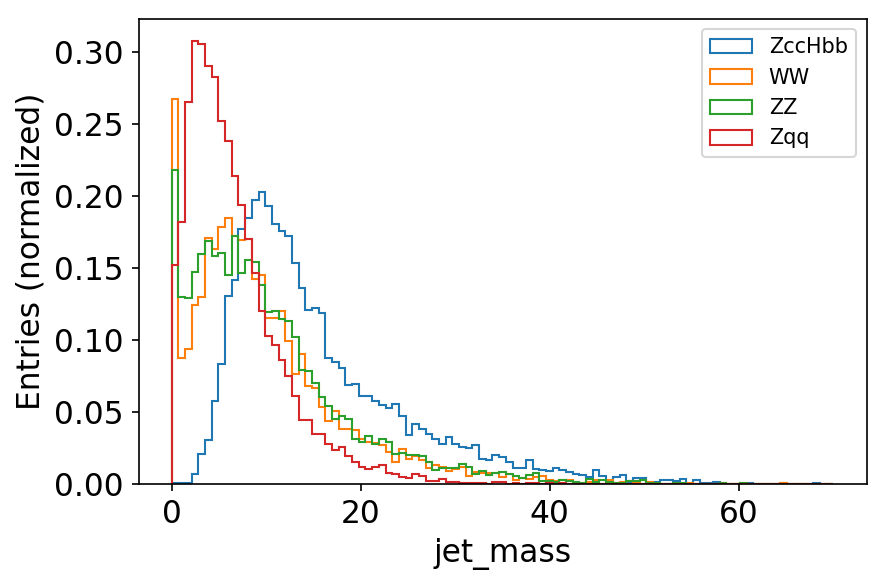

In [38]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_mass")

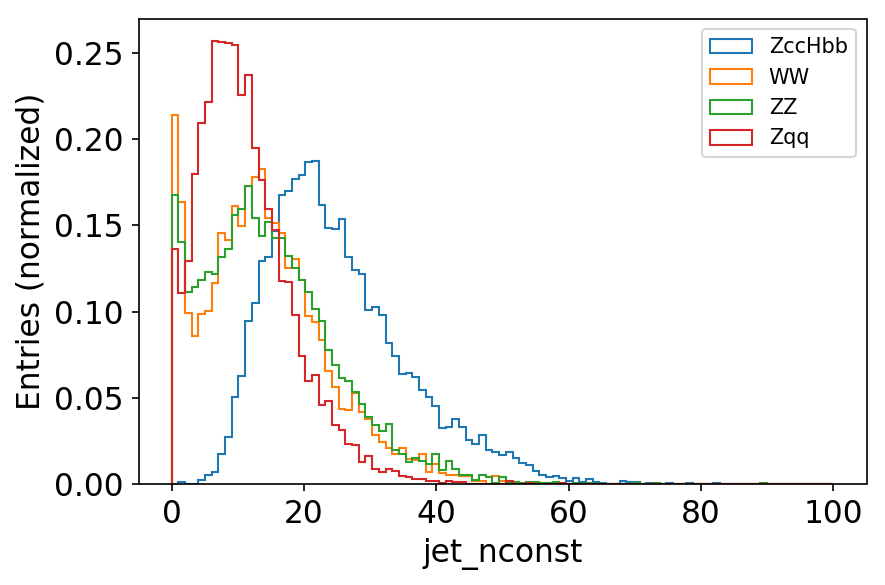

In [12]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_nconst")

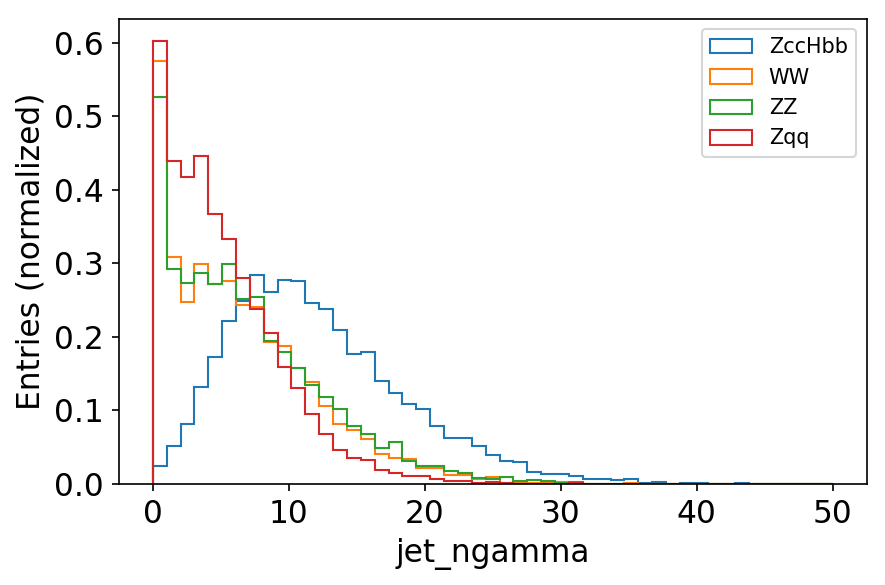

In [43]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_ngamma")

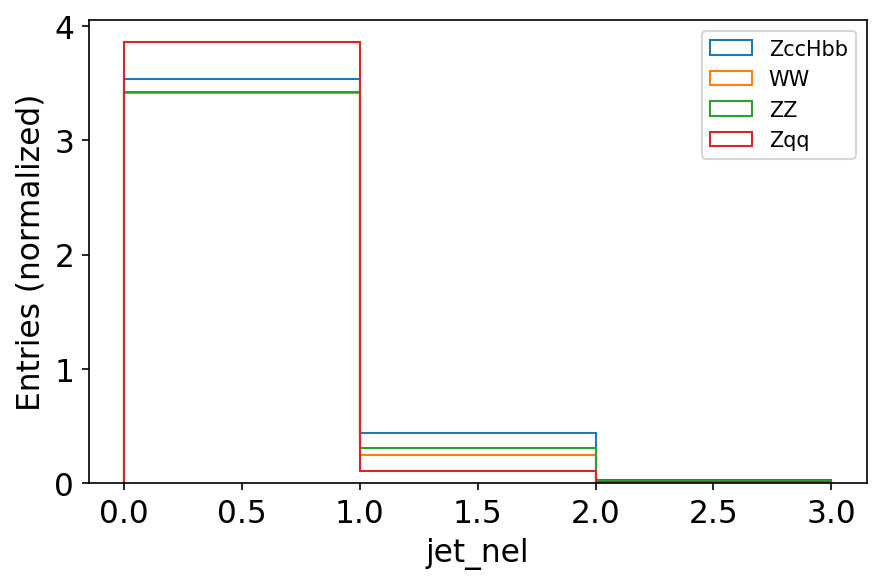

In [50]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_nel")

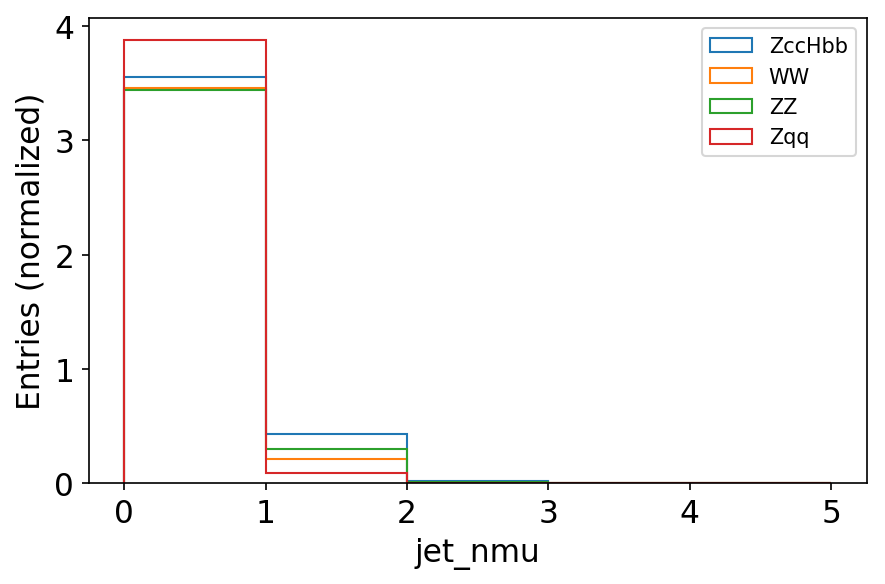

In [52]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_nmu")

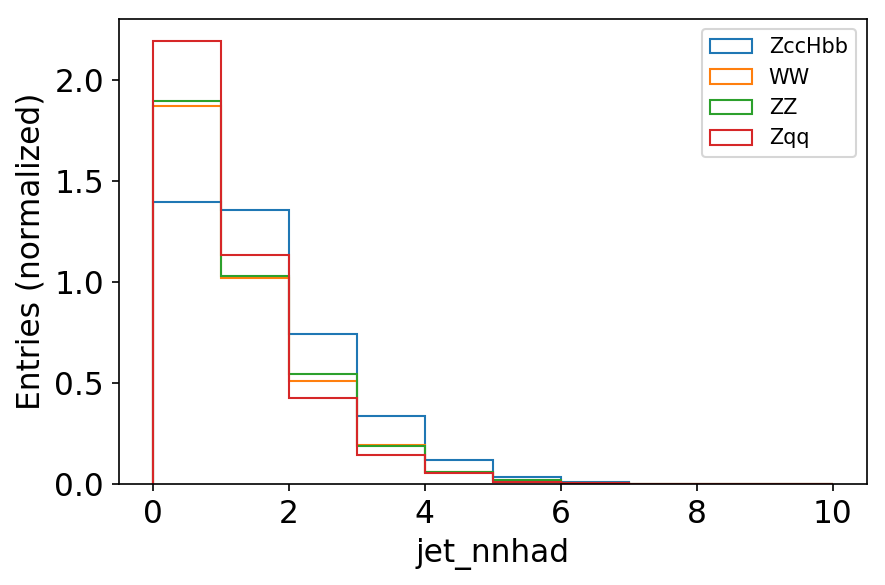

In [55]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_nnhad")

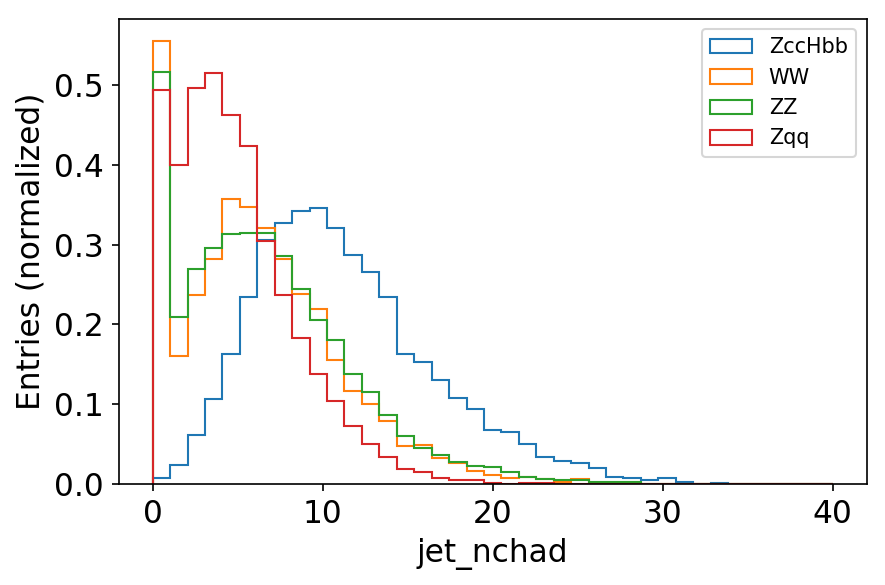

In [56]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "jet_nchad")

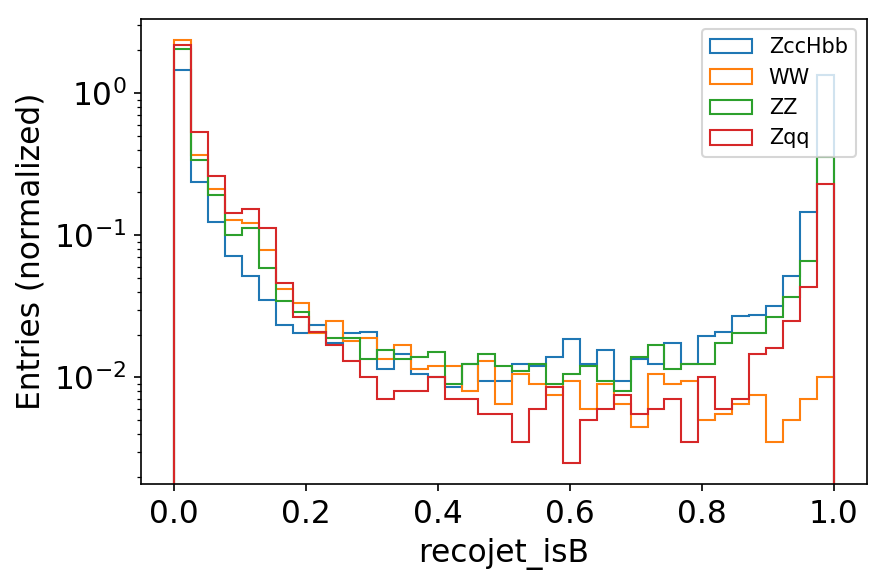

In [102]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojet_isB", 1)

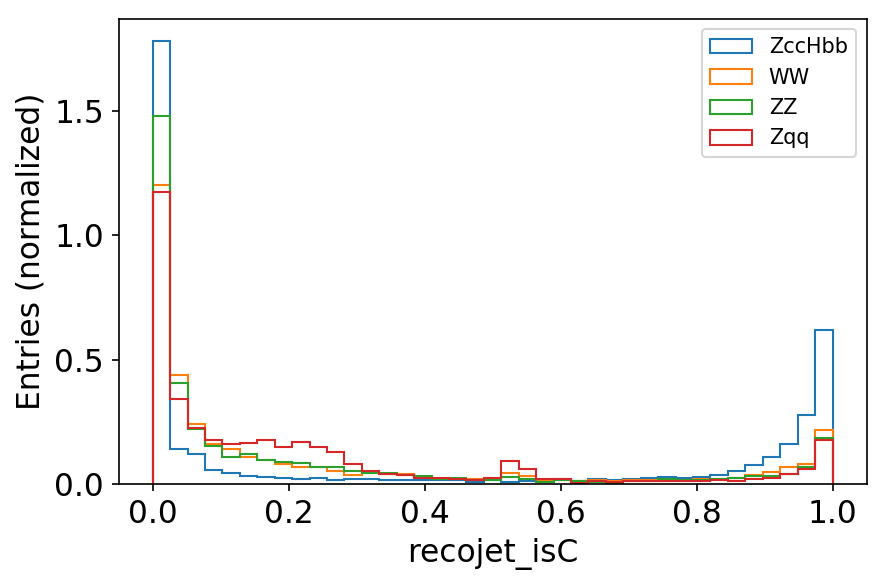

In [86]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojet_isC")

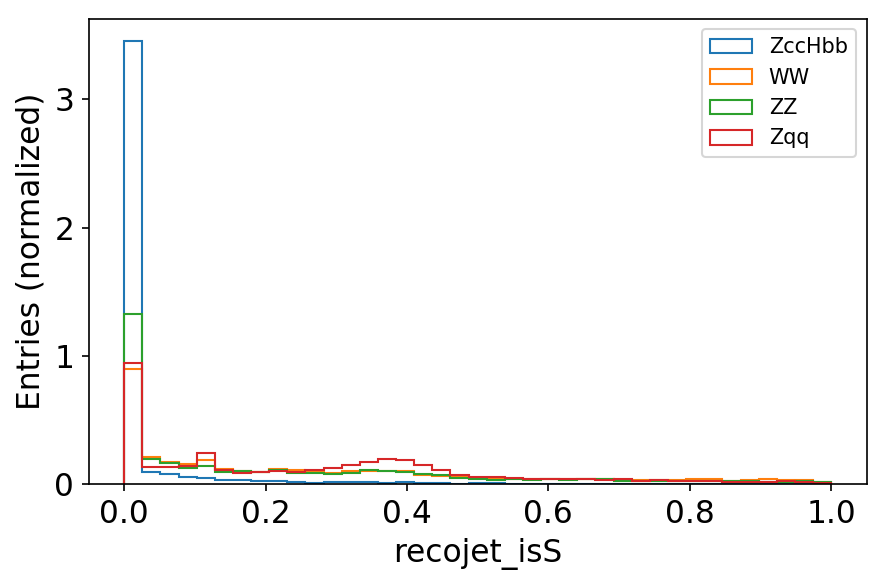

In [87]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojet_isS")

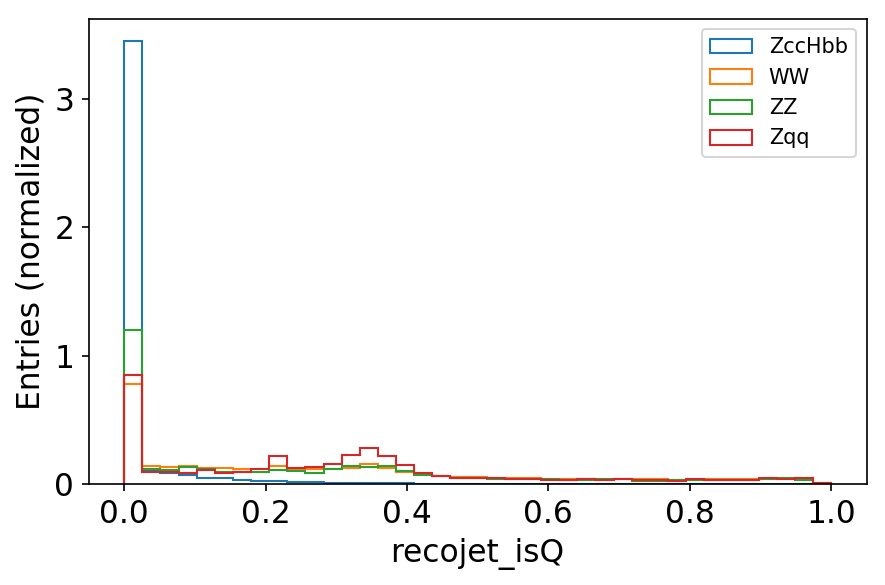

In [88]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojet_isQ")

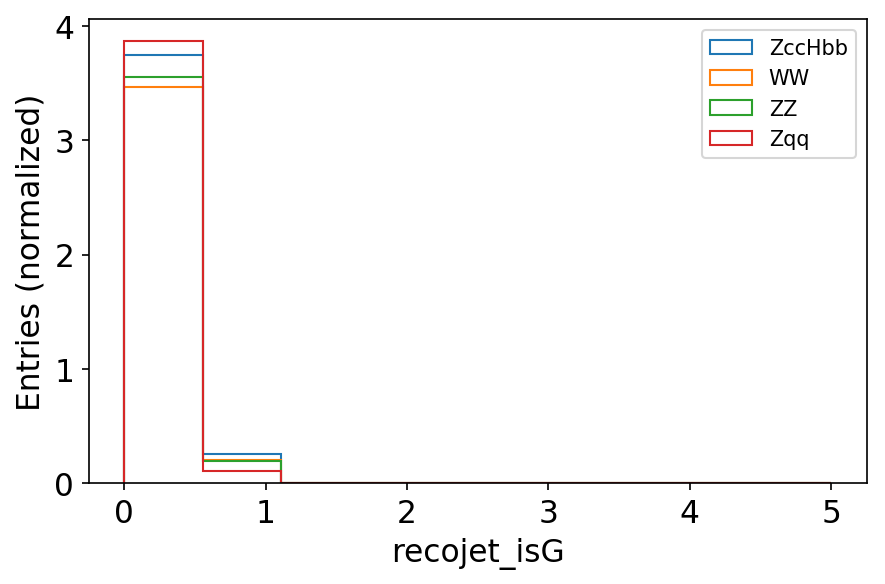

In [62]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojet_isG")

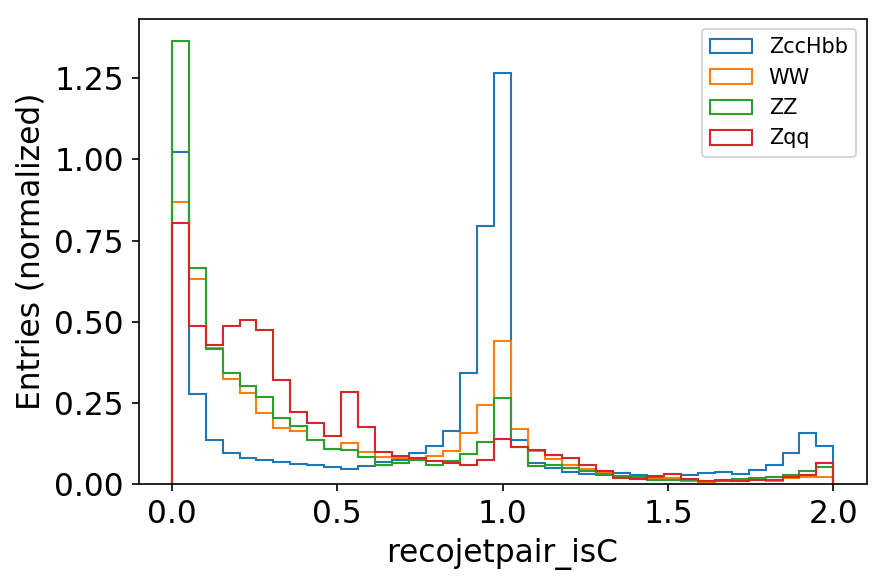

In [108]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "recojetpair_isC")

# Plot_Variable(["ZccHbb.root"],
#                "recojetpair_isC")

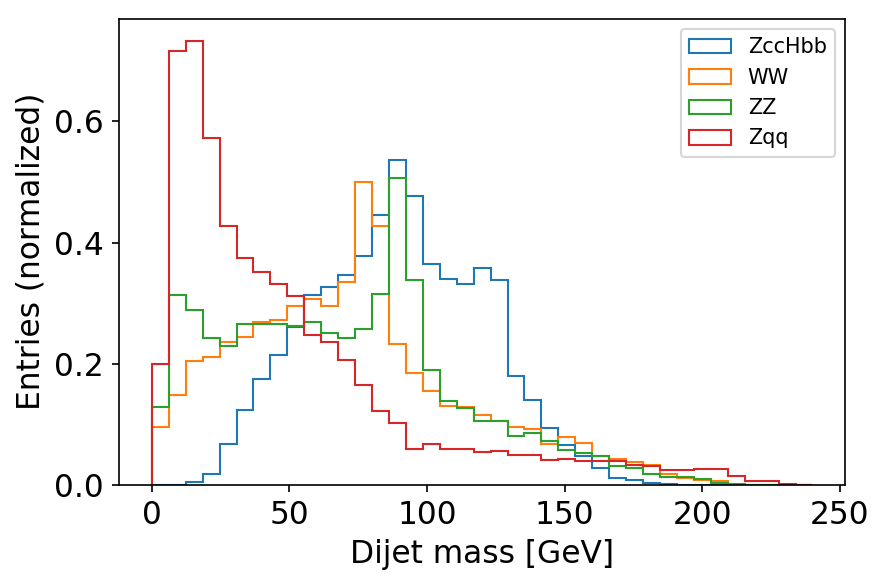

In [93]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "all_invariant_masses")

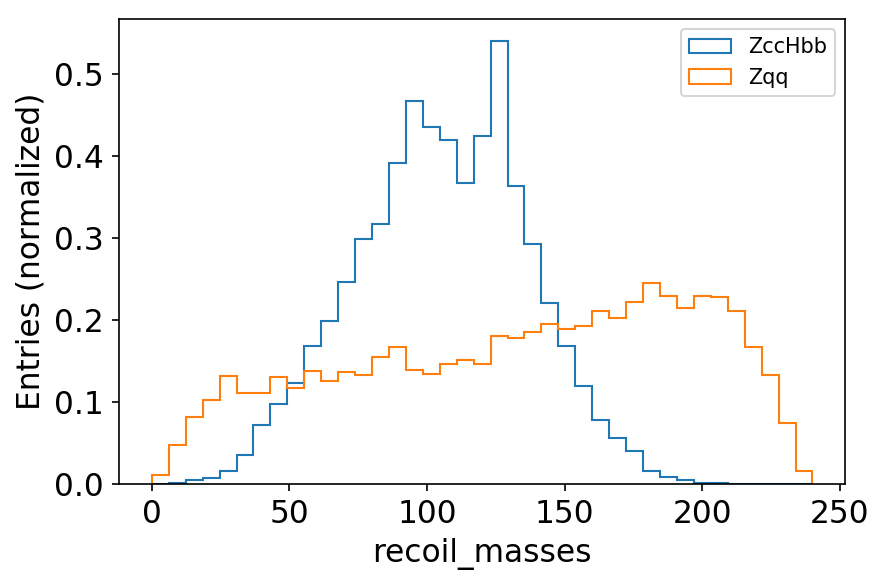

In [95]:
Plot_Variable(["ZccHbb.root",
               "Zqq.root"],
               "recoil_masses")

ValueError: zero-dimensional arrays cannot be concatenated

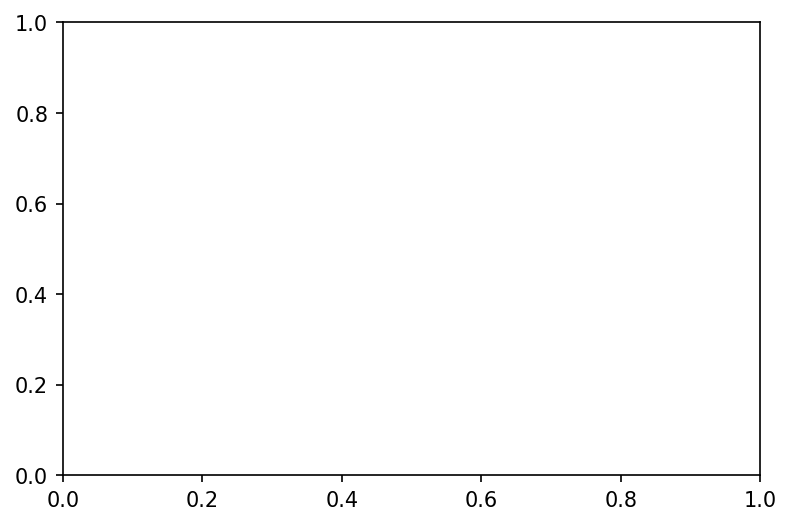

In [96]:
Plot_Variable(["ZccHbb.root",
               "WW.root",
               "ZZ.root",
               "Zqq.root"],
               "event_njet")